# <b> Image sharpening techniques </b>
## Here we understand how to implement various image sharpening techniques such as
### 1. Using Unsharp mask
### 2. Using Filter2D
### 3. Using Laplacian

## Making the necessary imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## <b>1. Using Unsharp Mask

## Reading and obtaining a smooth image

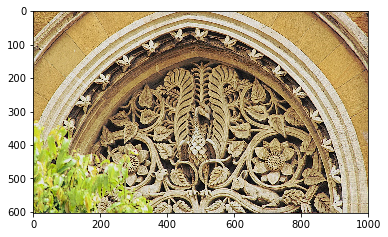

In [2]:
og = cv2.imread("VT.jpg")
og = cv2.cvtColor(og, cv2.COLOR_BGR2RGB)
plt.imshow(og)

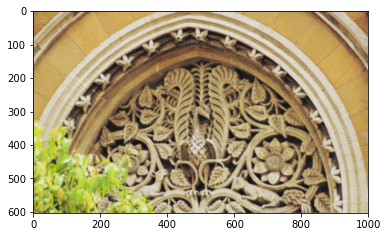

In [3]:
gaussian_img = cv2.GaussianBlur(og, (0, 0), 2.0)
plt.imshow(gaussian_img)

## Using Unsharp Mask method

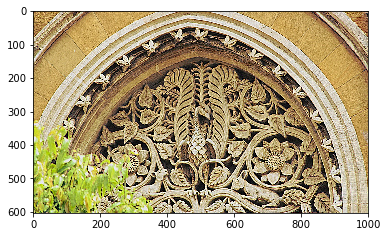

In [4]:
unsharp_img = cv2.addWeighted(og, 1.5, gaussian_img, -0.5, 0, og)
plt.imshow(unsharp_img)

## <b>2. Using Filter2D

## Reading and obtaining a smooth image

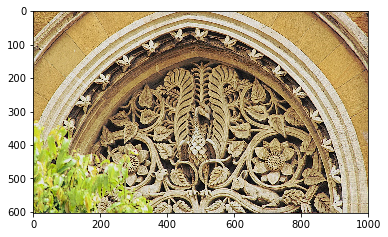

In [5]:
og = cv2.imread('VT.jpg')
og = cv2.cvtColor(og, cv2.COLOR_BGR2RGB)
plt.imshow(og)

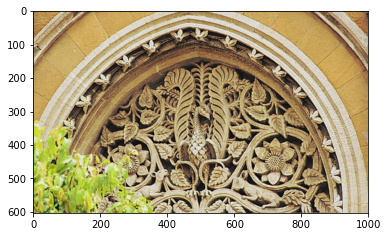

In [6]:
blurred = cv2.blur(og, (4, 4))
plt.imshow(blurred)

## Using Filter2D method

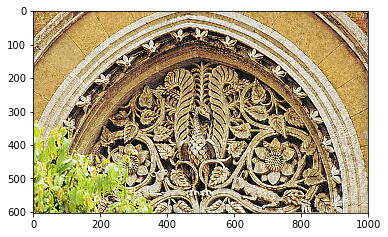

In [7]:
kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpen_img = cv2.filter2D(blurred, -1, kernel)
plt.imshow(sharpen_img)

## <b>3. Using Laplacian

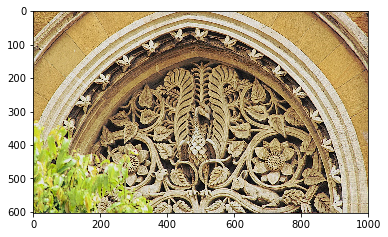

In [8]:
og = cv2.imread('VT.jpg')
og = cv2.cvtColor(og, cv2.COLOR_BGR2RGB)
plt.imshow(og)

## Function to apply laplacian filter to each color sample

In [9]:
def Laplacian_sharp(image, sigma, strength):
    # Applying median blurrin
    image_mf = cv2.medianBlur(image, sigma)
    
    # Calculating Laplacian
    lap = cv2.Laplacian(image_mf,cv2.CV_64F)
    
    # Sharpening the smoothened Laplacian
    sharp = image - strength*lap
    
    # Saturating pixel values
    sharp[sharp>255] = 255
    sharp[sharp<0] = 0
    
    return sharp

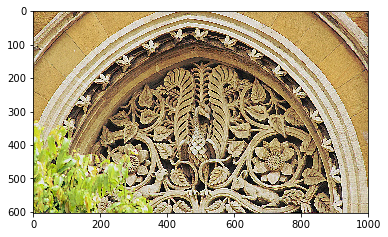

In [10]:
sharpen = np.zeros_like(og)

for i in range(3):
    sharpen[:,:,i] = Laplacian_sharp(og[:,:,i], 5, 0.8)

plt.imshow(sharpen)